# Binding-Pocket Interactions of Four EGFR Inhibitors

For this notebook, we use mdciao to visualize the binding-pocket interactions of four **Epidermal Growth Factor Receptor (EGFR) inhibitors**. EGFR is an important drug target with implications in cancer and inflammation ([Wikipedia](https://en.wikipedia.org/wiki/Epidermal_growth_factor_receptor)). It is a transmembrane protein with an extracellular receptor domain and an intracellular kinase domain.

The molecular dynamics (MD) data used here was generated by slightly modifying the notebook 

* [T019 · Molecular dynamics simulation](https://projects.volkamerlab.org/teachopencadd/talktorials/T019_md_simulation.html)

which is part of the impressive [TeachOpenCADD](https://projects.volkamerlab.org/teachopencadd/index.html) collection, made available as teaching platform for computer-aided drug design by the [Volkamer Lab at Charité Univeristätsmedizin Berlin](https://volkamerlab.org/index.html). 


The four inhibitors and structures are chosen from the following RCSB entries:

* [*The crystal structure of EGFR T790M/C797S with the inhibitor HCD2892 (PDB ID 7VRE)*](https://www.rcsb.org/structure/7VRE)

* [*EGFR kinase domain complexed with compound 20a (PDB ID 3W32)*](https://www.rcsb.org/structure/3W32)

* [*EGFR Kinase domain complexed with tak-285 (PDB ID 3POZ)*](https://www.rcsb.org/structure/3POZ)

* [*Crystal Structure of EGFR(L858R/T790M/C797S) in complex with CH7233163 (PDB ID 6LUB)*](https://www.rcsb.org/structure/6LUB)  

Please see the references at the bottom of the notebook for more information.

In [1]:
import mdciao
import os
import matplotlib
import nglview
from glob import glob

# Consensus labeler object for KLIFS nomenclature
Since it will be used more than once, it is better to have it instantiated only once and reused many times. The only thing we need is the [UniProt Accession Code](https://www.uniprot.org/uniprot/P00533) of the EGFR, `P00533`.

In [2]:
KLIFS = mdciao.nomenclature.LabelerKLIFS("P00533")

No local file ./KLIFS_P00533.xlsx found, checking online in
https://klifs.net/api/kinase_ID?kinase_name=P00533 ...done!
Please cite the following reference to the KLIF structural database:
 * Kanev et al, (2021) KLIFS: an overhaul after the first 5 years of supporting kinase research
   Nucleic Acids Research 49, D562--D569
   https://doi.org/10.1093/NAR/GKAA895
For more information, call mdciao.nomenclature.references()
Please cite the following reference to the UniProt Knowledgebase:
 * Bateman et al, (2021) UniProt: the universal protein knowledgebase in 2021
   Nucleic Acids Research 49, D480--D489
   https://doi.org/10.1093/NAR/GKAA1100
For more information, call mdciao.nomenclature.references()
done without 404, continuing.


# Download example data

In [3]:
if not os.path.exists("example_kinases"):
    mdciao.examples.fetch_example_data("EGFR");

# Guess molecular fragments 

In [4]:
for pdb in sorted(glob("example_kinases/*.pdb")):
    print(pdb)
    mdciao.fragments.get_fragments(pdb)
    print()

example_kinases/topology.3POZ.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    317 AAs   GLN701 (     0) -  LEU1017 (316   ) (0) 
fragment      1 with      1 AAs     03P1 (   317) -     03P1 (317   ) (1) 

example_kinases/topology.3W32.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    317 AAs   GLN701 (     0) -  LEU1017 (316   ) (0) 
fragment      1 with      1 AAs     W321 (   317) -     W321 (317   ) (1) 

example_kinases/topology.6LUB.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    323 AAs   GLY696 (     0) -  ILE1018 (322   ) (0) 
fragment      1 with      1 AAs     EUX1 (   323) -     EUX1 (323   ) (1) 

example_kinases/topology.7VRE.pdb
Auto-detected fragments with method 'lig_resSeq+'
fragment      0 with    323 AAs   GLY696 (     0) -  ILE1018 (322   ) (0) 
fragment      1 with      1 AAs     7VH1 (   323) -     7VH1 (323   ) (1) 



All three setups share the equivalent topology of kinase (fragment 0) and ligand (fragment 1):
 
 * from PDB ID `3POZ` ligand `P31`  
 
 * from PDB ID `3W32` ligand `W321` 
 
 * from PDB ID `6LUB` ligand `EUX1` 
 
 * from PDB ID `7VRE` ligand `7VH1` 


For labelling purposes, create a mapping between PDB IDs and ligand names:

In [5]:
pdb2lig = {"6LUB" : "EUX1", 
           "7VRE" : "7VH1", 
           "3W32" : "W321",
           "3POZ" : "P31"}

# Compute the ligand-kinase interactions for the four inhibitors  

In [6]:
binding_pocket = {}
for pdb in sorted(glob("example_kinases/*.pdb")):
    key = os.path.basename(pdb).split(".")[1]
    key="%s@%s"%(pdb2lig[key], key)
    xtc = pdb.replace(".pdb",".xtc").replace("topology","trajectory")
    binding_pocket[key]=mdciao.cli.interface(xtc, 
                                             pdb, 
                                             fragment_names=["EGFR", "ligand"],
                                             KLIFS_uniprotAC=KLIFS, 
                                             ctc_control=1.0, 
                                             frag_idxs_group_1=[0],
                                             frag_idxs_group_2=[1],
                                             ctc_cutoff_Ang=4, interface_cutoff_Ang=None,
                                             accept_guess=True, figures=False, no_disk=True)
    

Will compute contact frequencies for trajectories:
example_kinases/trajectory.3POZ.xtc
 with a stride of 1 frames
Using method 'lig_resSeq+' these fragments were found
fragment      0 with    317 AAs   GLN701 (     0) -  LEU1017 (316   ) (0) 
fragment      1 with      1 AAs     03P1 (   317) -     03P1 (317   ) (1) 
KLIFS-labels align best with fragments: [0] (first-last: GLN701-LEU1017).

These are the KLIFS fragments mapped onto your topology:
      I with      3 AAs   LYS716@I.1       (    15) -   LEU718@I.3       (17    ) (I) 
    g.l with      6 AAs   GLY719@g.l.4     (    18) -   GLY724@g.l.9     (23    ) (g.l) 
     II with      4 AAs   THR725@II.10     (    24) -   LYS728@II.13     (27    ) (II) 
    III with      6 AAs   VAL742@III.14    (    41) -   LEU747@III.19    (46    ) (III) 
     αC with     11 AAs   GLU758@αC.20     (    57) -   SER768@αC.30     (67    ) (αC) 
    b.l with      7 AAs   VAL769@b.l.31    (    68) -   ARG776@b.l.37    (75    ) (b.l)  resSeq jumps
     IV

  0%|                                                                             | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.52it/s]


These 28 contacts capture 20.38 (~99%) of the total frequency 20.50 (over 317 input contacts)
As orientation value, the first 21 ctcs already capture 90.0% of 20.50.
The 21-th contact has a frequency of 0.44


    freq                         label residue idxs    sum
0   1.00  C775@b.l.36     - P31@ligand       74 317   1.00
1   1.00  K745@III.17     - P31@ligand       44 317   2.00
2   1.00  M793@hinge.48   - P31@ligand       92 317   3.00
3   1.00  T854@xDFG.80    - P31@ligand      153 317   4.00
4   1.00  Q791@hinge.46   - P31@ligand       90 317   5.00
5   1.00  T790@GK.45      - P31@ligand       89 317   5.99
6   1.00  L844@VII.77     - P31@ligand      143 317   6.99
7   0.99  D855@xDFG.81    - P31@ligand      154 317   7.98
8   0.99  A743@III.15     - P31@ligand       42 317   8.97
9   0.98  F856@xDFG.82    - P31@ligand      155 317   9.96
10  0.96  L788@V.43       - P31@ligand       87 317  10.92
11  0.96  L777@IV.38      - P31@ligand       76 317  11.88
12  0.92  L792@hinge.47

  0%|                                                                             | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]


These 28 contacts capture 22.01 (~100%) of the total frequency 22.08 (over 317 input contacts)
As orientation value, the first 22 ctcs already capture 90.0% of 22.08.
The 22-th contact has a frequency of 0.51


    freq                          label residue idxs    sum
0   1.00  C775@b.l.36     - W321@ligand       74 317   1.00
1   1.00  F856@xDFG.82    - W321@ligand      155 317   2.00
2   1.00  D855@xDFG.81    - W321@ligand      154 317   3.00
3   1.00  T854@xDFG.80    - W321@ligand      153 317   4.00
4   1.00  T790@GK.45      - W321@ligand       89 317   5.00
5   1.00  M793@hinge.48   - W321@ligand       92 317   6.00
6   1.00  K745@III.17     - W321@ligand       44 317   7.00
7   1.00  L788@V.43       - W321@ligand       87 317   7.99
8   0.99  A743@III.15     - W321@ligand       42 317   8.99
9   0.99  Q791@hinge.46   - W321@ligand       90 317   9.98
10  0.99  L844@VII.77     - W321@ligand      143 317  10.96
11  0.99  R776@b.l.37     - W321@ligand       75 317  11.95
12  0.97 

  0%|                                                                             | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


These 24 contacts capture 17.65 (~99%) of the total frequency 17.84 (over 323 input contacts)
As orientation value, the first 18 ctcs already capture 90.0% of 17.84.
The 18-th contact has a frequency of 0.61


    freq                          label residue idxs    sum
0   1.00  M793@hinge.48   - EUX1@ligand       97 323   1.00
1   1.00  L718@I.3        - EUX1@ligand       22 323   2.00
2   1.00  Q791@hinge.46   - EUX1@ligand       95 323   3.00
3   1.00  P794@linker.49  - EUX1@ligand       98 323   4.00
4   1.00  M790@GK.45      - EUX1@ligand       94 323   4.99
5   1.00  L792@hinge.47   - EUX1@ligand       96 323   5.99
6   0.99  V726@II.11      - EUX1@ligand       30 323   6.98
7   0.97  G796@linker.51  - EUX1@ligand      100 323   7.95
8   0.97  G724@g.l.9      - EUX1@ligand       28 323   8.92
9   0.96  L844@VII.77     - EUX1@ligand      148 323   9.87
10  0.94  K745@III.17     - EUX1@ligand       49 323  10.82
11  0.93  A743@III.15     - EUX1@ligand       47 323  11.74
12  0.83  

  0%|                                                                             | 0/1 [00:00<?, ?it/s]

100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.44it/s]

These 17 contacts capture 13.02 (~97%) of the total frequency 13.39 (over 323 input contacts)
As orientation value, the first 15 ctcs already capture 90.0% of 13.39.
The 15-th contact has a frequency of 0.40


    freq                          label residue idxs    sum
0   1.00  M793@hinge.48   - 7VH1@ligand       97 323   1.00
1   1.00  L718@I.3        - 7VH1@ligand       22 323   2.00
2   0.98  V726@II.11      - 7VH1@ligand       30 323   2.97
3   0.96  P794@linker.49  - 7VH1@ligand       98 323   3.93
4   0.95  A743@III.15     - 7VH1@ligand       47 323   4.88
5   0.94  L844@VII.77     - 7VH1@ligand      148 323   5.82
6   0.92  Q791@hinge.46   - 7VH1@ligand       95 323   6.74
7   0.92  G796@linker.51  - 7VH1@ligand      100 323   7.66
8   0.91  F723@g.l.8      - 7VH1@ligand       27 323   8.57
9   0.82  L792@hinge.47   - 7VH1@ligand       96 323   9.40
10  0.72  T854@xDFG.80    - 7VH1@ligand      158 323  10.12
11  0.68  K745@III.17     - 7VH1@ligand       49 323  10.80
12  0.66  

# Compare interactions across the four compounds in a violinplot
Additionally, we will display *representative* geometries directly on the violinplots via their residue-residue distance-values. Subsequently, we will view these geometries in 3D

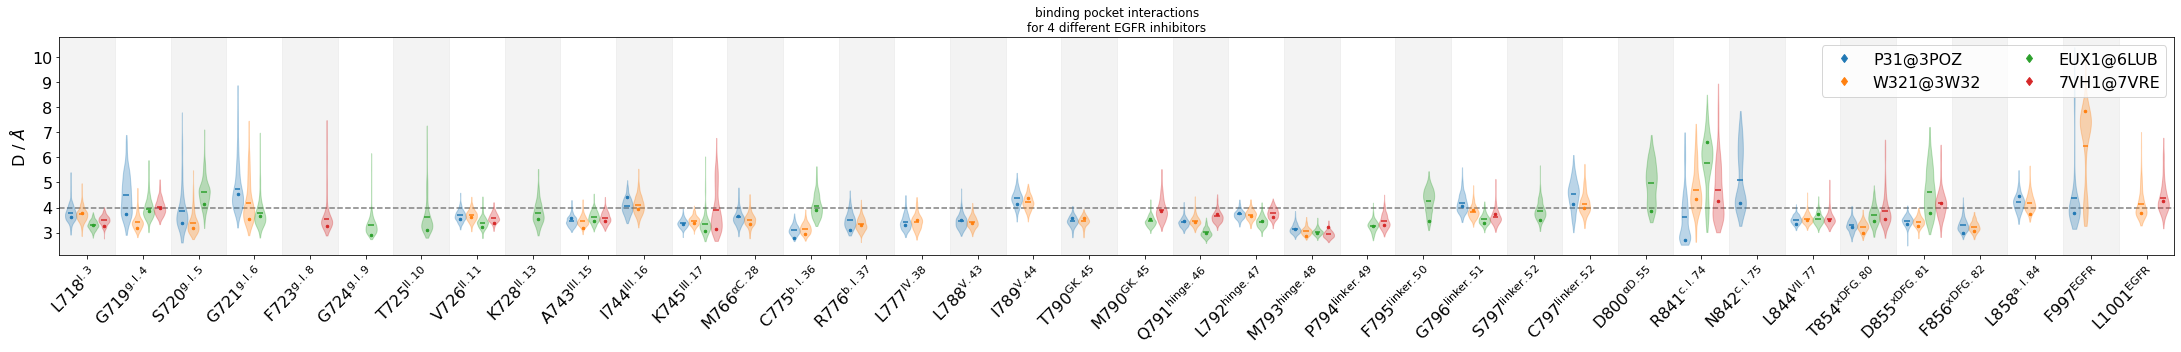

In [7]:
colors = mdciao.plots.color_dict_guesser("tab10", binding_pocket.keys())
myfig, myax, keys = mdciao.plots.compare_violins(binding_pocket,
                                                 colors=colors,           
                                                 anchor="ligand", 
                                                 ctc_cutoff_Ang=4,
                                                 mutations_dict={
                                                     "EUX1": "ligand",
                                                     "7VH1": "ligand",
                                                     "W321": "ligand",
                                                     "P31": "ligand"
                                                 },
                                                 defrag=None,
                                                 sort_by="residue",
                                                 inch_per_contacts=.80,
                                                 legend_rows=2,   
                                                 representatives=True,
                                         )
myax.set_title("binding pocket interactions"
               "\nfor 4 different EGFR inhibitors")
myfig.tight_layout()
#myfig.savefig("EGFR.png", bbox_inches="tight")

# Show the representative geometries
These are the same geometries being shown as small dots inside the violins of the previous figure, using the [repframes](https://proteinformatics.uni-leipzig.de/mdciao/api/generated/generated/mdciao.contacts.ContactGroup.html#mdciao.contacts.ContactGroup.repframes) method:

In [8]:
representatives = {}
ref = None
for key, bp in binding_pocket.items():
    repframe = bp.repframes(return_traj=True)[-1][0]
    representatives[key] = repframe

Returning frame 83 of traj nr. 0: example_kinases/trajectory.3POZ.xtc
Returning frame 197 of traj nr. 0: example_kinases/trajectory.3W32.xtc
Returning frame 369 of traj nr. 0: example_kinases/trajectory.6LUB.xtc
Returning frame 253 of traj nr. 0: example_kinases/trajectory.7VRE.xtc


# Superpose structures using the KLIFs alignment labels
This way, the alignment will be particularly good in the binding pocket

In [9]:
KLIFS_alignment = mdciao.nomenclature.AlignerConsensus({key : bp.top for key, bp in binding_pocket.items()},
                                                       CL=KLIFS)
KLIFS_alignment.AAresSeq

consensus P31@3POZ W321@3W32 EUX1@6LUB 7VH1@7VRE
0      GK.45   THR790    THR790    MET790    MET790
1        I.1   LYS716    LYS716    LYS716    LYS716
2        I.2   VAL717    VAL717    VAL717    VAL717
3        I.3   LEU718    LEU718    LEU718    LEU718
4      II.10   THR725    THR725    THR725    THR725
..       ...      ...       ...       ...       ...
80     αE.60   TYR827    TYR827    TYR827    TYR827
81     αE.61   LEU828    LEU828    LEU828    LEU828
82     αE.62   GLU829    GLU829    GLU829    GLU829
83     αE.63   ASP830    ASP830    ASP830    ASP830
84     αE.64   ARG831    ARG831    ARG831    ARG831

[85 rows x 5 columns]

In [10]:
# We can directly get CA indices to map atoms
KLIFS_alignment.CAidxs

consensus  P31@3POZ  W321@3W32  EUX1@6LUB  7VH1@7VRE
0      GK.45      1435       1435       1495       1495
1        I.1       280        280        340        340
2        I.2       302        302        362        362
3        I.3       318        318        378        378
4      II.10       399        399        459        459
..       ...       ...        ...        ...        ...
80     αE.60      2029       2029       2092       2092
81     αE.61      2050       2050       2113       2113
82     αE.62      2069       2069       2132       2132
83     αE.63      2084       2084       2147       2147
84     αE.64      2096       2096       2159       2159

[85 rows x 5 columns]

In [11]:
ref_key = "W321@3W32" # We take this one but could be any one
ref_geom = representatives[ref_key]
for key, geom in representatives.items():
    if key!=ref_key:
        ref_CAs, key_CAs = KLIFS_alignment.CAidxs[[ref_key, key]].values.T
        geom.superpose(ref_geom, atom_indices=key_CAs, ref_atom_indices=ref_CAs)
        

# Visualize residues with different behaviors in each compound
For example, residues 
* `775@b.l.36` 
* `841@c.l.74` 
* `855@xDFG.81`
* `997@EGFR` (doesn't have a KLIFS label)

In [12]:
colors = {key: matplotlib.colors.to_hex(col) for key, col in colors.items()}
iwd = nglview.NGLWidget()
for ii, (key, rep) in enumerate(representatives.items()):
    iwd.add_trajectory(rep)
    iwd.clear_representations(component=ii)
    iwd.add_cartoon(color="white", component=ii)
    iwd.add_licorice(color=colors[key], component=ii, selection="(775 841 855 997) and not Hydrogen", radius=.1)
    iwd.add_ball_and_stick(color=colors[key], component=ii, 
                           selection="not protein and not Hydrogen",
                           radius=.1,
                          )
iwd

NGLWidget()

# References

* [The crystal structure of EGFR T790M/C797S with the inhibitor HCD2892 (PDB ID 7VRE)](https://www.rcsb.org/structure/7VRE)
  * Chen, H., Lai, M., Zhang, T., Chen, Y., Tong, L., Zhu, S., … Ding, K. (2022).   
    Conformational Constrained 4-(1-Sulfonyl-3-indol)yl-2-phenylaminopyrimidine Derivatives as New Fourth-Generation Epidermal Growth Factor Receptor Inhibitors Targeting T790M/C797S Mutations.   
    Journal of Medicinal Chemistry, 65(9), 6840–6858.   
    https://doi.org/10.1021/acs.jmedchem.2c00168
* [EGFR kinase domain complexed with compound 20a (PDB ID 3W32)](https://www.rcsb.org/structure/3W32)
  * Kawakita, Y., Seto, M., Ohashi, T., Tamura, T., Yusa, T., Miki, H., … Ishikawa, T. (2013).   
    Design and synthesis of novel pyrimido[4,5- b ]azepine derivatives as HER2/EGFR dual inhibitors.   
    Bioorganic & Medicinal Chemistry, 21(8), 2250–2261.   
    https://doi.org/10.1016/j.bmc.2013.02.014
* [EGFR Kinase domain complexed with tak-285 (PDB ID 3POZ)](https://www.rcsb.org/structure/3POZ)
  * Aertgeerts, K., Skene, R., Yano, J., Sang, B. C., Zou, H., Snell, G., … Sogabe, S. (2011).   
    Structural analysis of the mechanism of inhibition and allosteric activation of the kinase domain of HER2 protein.  
    Journal of Biological Chemistry, 286(21), 18756–18765.  
    https://doi.org/10.1074/jbc.M110.206193
* [Crystal Structure of EGFR(L858R/T790M/C797S) in complex with CH7233163 (PDB ID 6LUB)](https://www.rcsb.org/structure/6LUB)  
  * Kashima, K., Kawauchi, H., Tanimura, H., Tachibana, Y., Chiba, T., Torizawa, T., & Sakamoto, H. (2020).  
    CH7233163 Overcomes Osimertinib-Resistant EGFR-Del19/T790M/C797S Mutation.   
    Molecular Cancer Therapeutics, 19(11), 2288–2297.  
    https://doi.org/10.1158/1535-7163.MCT-20-0229